In [2]:
import numpy as np
import pickle
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science','ieee'])
%matplotlib inline

In [3]:
node_nums = [5, 7, 9]

mean = []
std = []

for node_num in node_nums:
    file = f"size_dist_{node_num}.pkl"
    with open(file, "rb") as f:
        data = pickle.load(f)
    p_mean = []
    p_std = []
    for k in sorted(data):
        p_mean.append(data[k]['mean'])
        p_std.append(data[k]['std'])

    p_mean = np.array(p_mean)
    p_std = np.array(p_std)
    
    mean.append(p_mean)
    std.append(p_std)

In [4]:
x = range(1, 17)

In [4]:
clamp = lambda x: x if x > 1 else 1

Text(0, 0.5, 'gate number')

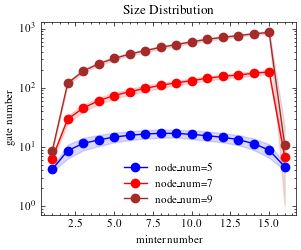

In [9]:
fig, ax = plt.subplots()
fig.set_dpi(100.0)
ax.set_title("Size Distribution")
ax.plot(x, mean[0], 'o-', color='blue', label='node_num=5')
ax.plot(x, mean[1], 'o-', color='red', label='node_num=7')
ax.plot(x, mean[2], 'o-', color='brown', label='node_num=9')
ax.legend()
ax.fill_between(x, mean[0]+std[0], list(map(clamp, mean[0]-std[0])), alpha=0.15, color='blue')
ax.fill_between(x, mean[1]+std[1], list(map(clamp, mean[1]-std[1])), alpha=0.15, color='red')
ax.fill_between(x, mean[2]+std[2], list(map(clamp, mean[2]-std[2])), alpha=0.15, color='brown')
ax.set_xlabel("minternumber")
ax.set_yscale("log")
ax.set_ylabel("gate number")
# fig.savefig("pic.svg", format="svg")

## GateNum vs Size

In [5]:
file = f"node_num_dist.pkl"
with open(file, "rb") as f:
    node_num_scan = pickle.load(f)
    
file_minterm = "scan_minterm_dist.pkl"
with open(file_minterm, "rb") as f:
    minterm_scan = pickle.load(f)

In [6]:
node_mean = np.zeros((50, 50))
node_std = np.zeros((50, 50))

for k, v in node_num_scan.items():
    node_num, minterm_num = k
    node_mean[minterm_num][node_num] = v['mean']
    node_std[minterm_num][node_num] = v['std']
    
node_x = list(range(6, 15, 1))
node_y = node_mean[10, 6:15]
node_y_2 = node_mean[20, 6:15]
node_y_3 = node_mean[30, 6:15]

In [7]:
minterm_mean = np.zeros((50, 50))
minterm_std = np.zeros((50, 50))

for k, v in minterm_scan.items():
    node_num, minterm_num = k
    minterm_mean[minterm_num][node_num] = v['mean']
    minterm_std[minterm_num][node_num] = v['std']
    
minterm_x = list(range(1, 20, 2))
minterm_y = minterm_mean[1:20:2, 6]
minterm_y_2 = minterm_mean[1:20:2, 8]
minterm_y_3 = minterm_mean[1:20:2, 10]

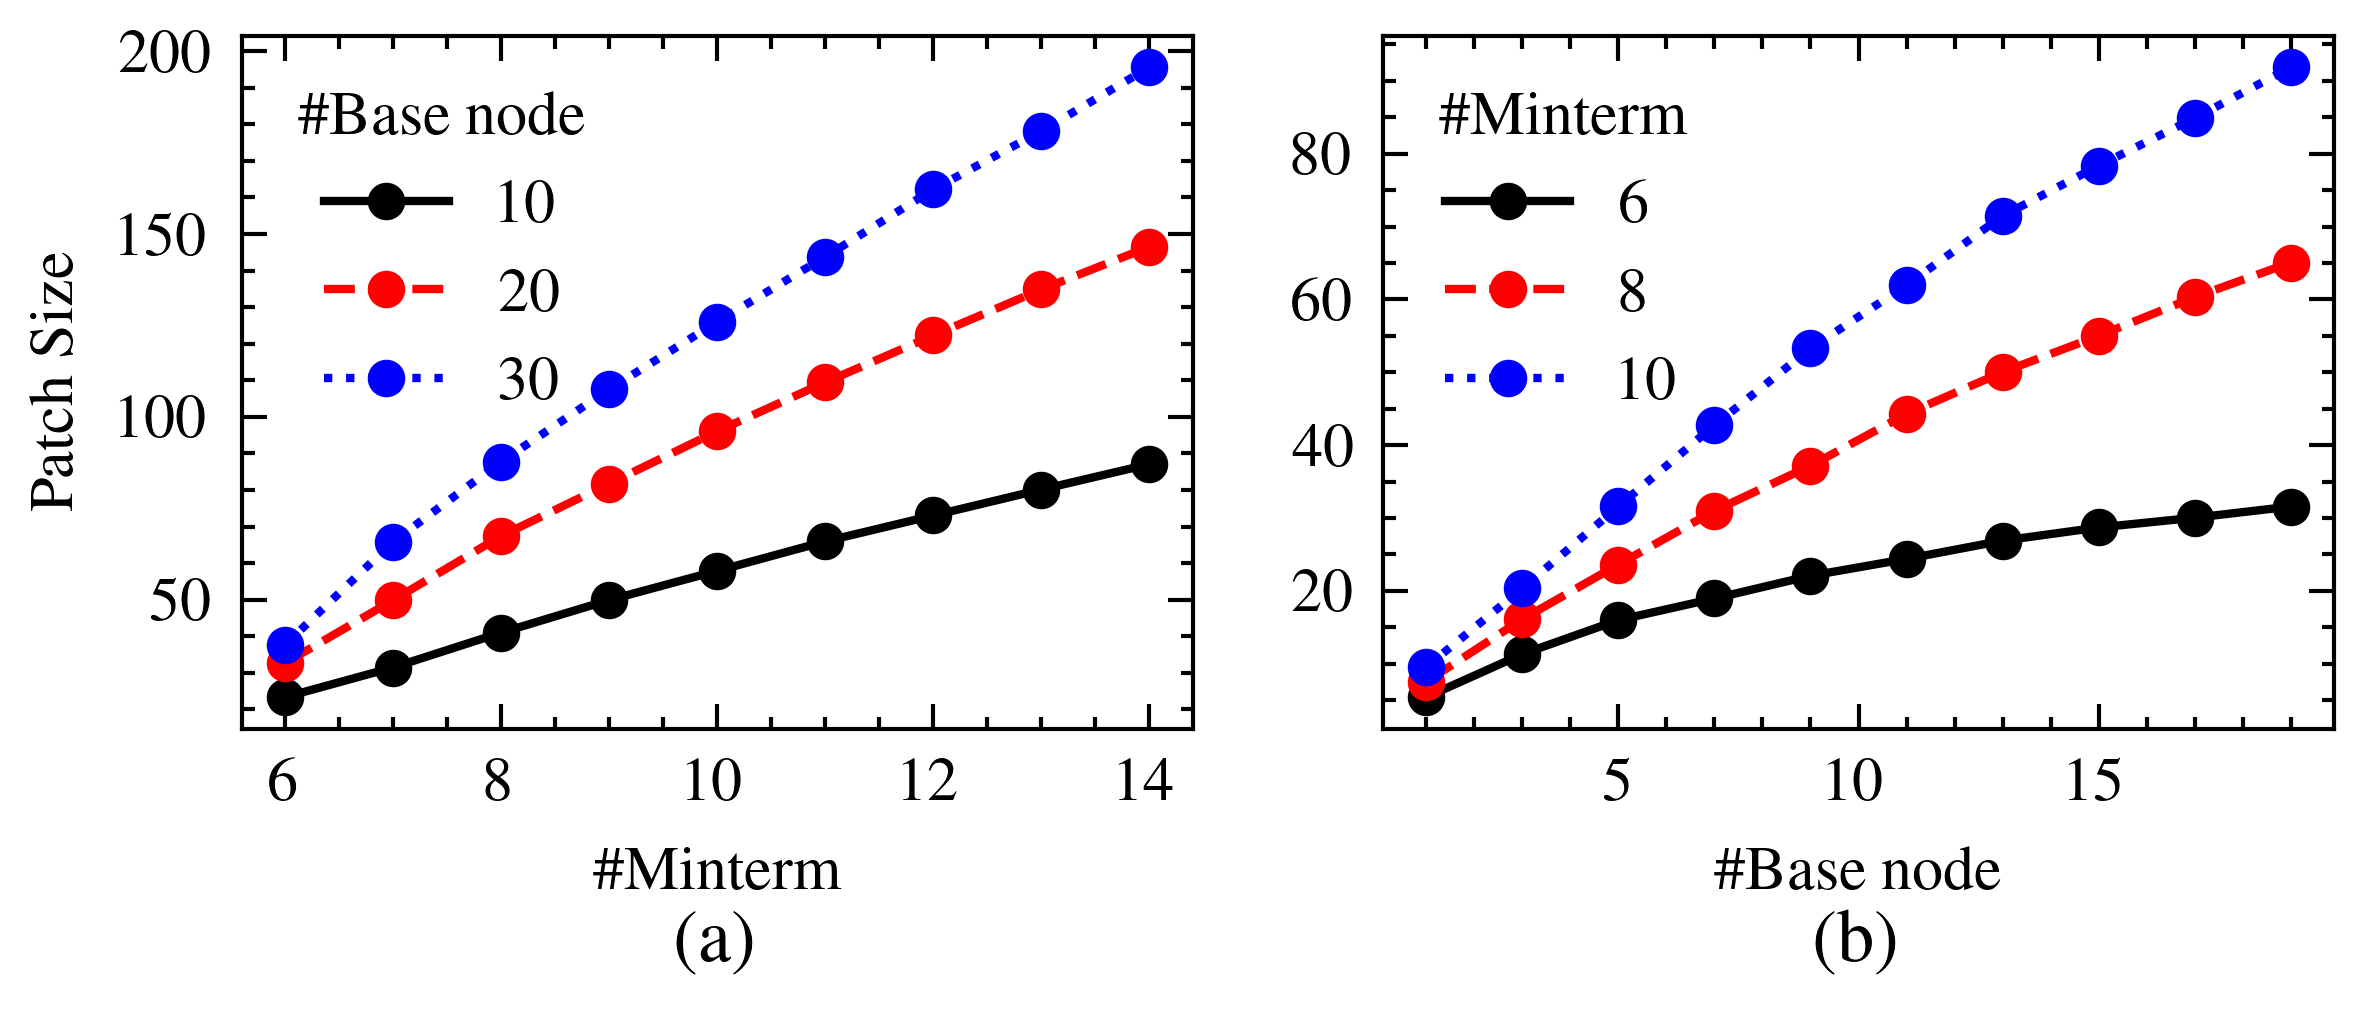

In [18]:
marker_size = 3.5

mpl.rcParams['figure.figsize'] = 4.5, 1.5
mpl.rcParams['font.size'] = 7.5

fig, ax = plt.subplots(1, 2)
ax[0].set_title("(a)", y=-0.41)
ax[0].plot(node_x, node_y, node_x, node_y_2, node_x, node_y_3, marker="o", markersize=marker_size)
ax[0].legend(labels=["10", "20", "30"], title="\#Base node")
ax[0].set_xlabel("\#Minterm")
ax[0].set_ylabel("Patch Size")

ax[1].set_title("(b)", y=-0.41)
ax[1].plot(minterm_x, minterm_y, minterm_x, minterm_y_2, minterm_x, minterm_y_3, marker="o", markersize=marker_size)
ax[1].legend(labels=['6', '8', '10'], title="\#Minterm")
ax[1].set_xlabel("\#Base node")
# fig.show()
# plt.figure(figsize=(5, 2))
fig.savefig("size_dist.pdf")